In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation1: str
    num3: int
    num4: int
    operation2: str
    result1: int
    result2: int

In [3]:
def add_node1(state: AgentState) -> AgentState:
    """Add the first node to the state graph."""
    state['result1'] = state['num1'] + state['num2']
    return state
def add_node2(state: AgentState) -> AgentState:
    """Add the second node to the state graph."""
    state['result2'] = state['num3'] + state['num4']
    return state

def subtract_node1(state: AgentState) -> AgentState:
    """Subtract the first node from the state graph."""
    state['result1'] = state['num1'] - state['num2']
    return state
def subtract_node2(state: AgentState) -> AgentState:
    """Subtract the second node from the state graph."""
    state['result2'] = state['num3'] - state['num4']
    return state

def decide_node1(state: AgentState) -> AgentState:
    """Decide the first node's operation based on the state."""
    if state['operation1'] == '+':
        return "addition_operation1"
    elif state['operation1'] == '-':
        return "subtraction_operation1"

def decide_node2(state: AgentState) -> AgentState:
    """Decide the second node's operation based on the state."""
    if state['operation2'] == '+':
        return "addition_operation2"
    elif state['operation2'] == '-':
        return "subtraction_operation2"

In [4]:
graph = StateGraph(AgentState)

graph.add_node("adder", add_node1)
graph.add_node("subtractor", subtract_node1)  
graph.add_node("router", lambda state: state)

graph.add_node("adder2", add_node2)
graph.add_node("subtractor2", subtract_node2)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_node1,
    {
        "addition_operation1": "adder",
        "subtraction_operation1": "subtractor"
    }
)

graph.add_edge("adder", "router2")
graph.add_edge("subtractor", "router2")
graph.add_conditional_edges(
    "router2",
    decide_node2,
    {
        "addition_operation2": "adder2",
        "subtraction_operation2": "subtractor2"
    }
)

graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)

app = graph.compile()

In [5]:
from IPython.display import Image ,display

def display_app(app):
    """Display the compiled app"""
    display(Image(app.get_graph().draw_mermaid_png()))

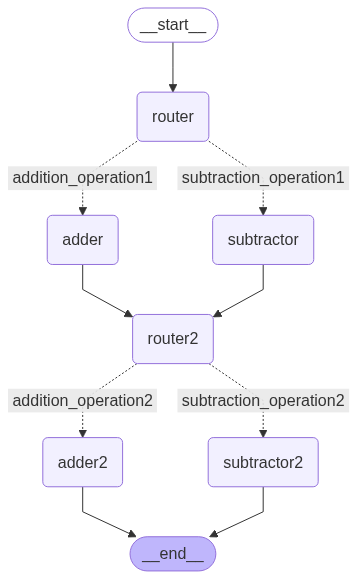

In [6]:
display_app(app)

In [7]:
initial_state = AgentState(num1 = 10, num2 = 5, operation1="-", num3 = 7, num4=2, operation2="+")

In [8]:
answer = app.invoke(initial_state)

In [9]:
answer['result1']

5

In [10]:
answer['result2']

9